## Data Cleaning

In [210]:
import pandas as pd

In [211]:
#load the page level data and document level data for each document class (stored in different folders)
rel_page=pd.read_csv('Data/betadata-master/medical_records_release_form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
rel_page['class']='1'
rel_doc=pd.read_csv('Data/betadata-master/medical_records_release_form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
rel_doc['class']='1'
cons_page=pd.read_csv('Data/betadata-master/informed consent form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
cons_page['class']='2'
cons_doc=pd.read_csv('Data/betadata-master/informed consent form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
cons_doc['class']='2'
int_page=pd.read_csv('Data/betadata-master/patient intake form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
int_page['class']='3'
int_doc=pd.read_csv('Data/betadata-master/patient intake form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
int_doc['class']='3'
med_page=pd.read_csv('Data/betadata-master/medical form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
med_page['class']='4'
med_doc=pd.read_csv('Data/betadata-master/medical form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
med_doc['class']='4'
#print the dimensions
dataframes=[rel_page,rel_doc,cons_page,cons_doc,int_page,int_doc,med_page,med_doc]
for d in dataframes:
    print d.shape

(601, 8)
(306, 7)
(2135, 8)
(467, 7)
(2170, 8)
(488, 7)
(246, 8)
(87, 7)


In [212]:
#combine into one page-level dataframe and one document-level dataframe
doc_level=[rel_doc,cons_doc,int_doc,med_doc]
page_level=[rel_page,cons_page,int_page,med_page]
data_doc=pd.concat(doc_level)
data_page=pd.concat(page_level)
print data_doc.shape 
print data_page.shape 

(1348, 7)
(5152, 8)


In [213]:
#shuffle rows
data_doc = data_doc.sample(frac=1).reset_index(drop=True)
data_page= data_page.sample(frac=1).reset_index(drop=True)
print data_doc['class'].value_counts(normalize=True)
print data_page['class'].value_counts(normalize=True)

3    0.362018
2    0.346439
1    0.227003
4    0.064540
Name: class, dtype: float64
3    0.421196
2    0.414402
1    0.116654
4    0.047748
Name: class, dtype: float64


In [214]:
#remove duplicates and NAs based on text content - expected to be a lot of these
data_doc=data_doc.drop_duplicates(subset=['text']).dropna(subset=['text'])
data_page=data_page.drop_duplicates(subset=['text']).dropna(subset=['text'])
#add an extra id column
data_doc['id'] = range(1, len(data_doc) + 1)
data_page['id'] = range(1, len(data_page) + 1)
print data_doc.shape
print data_page.shape

(951, 8)
(3630, 9)


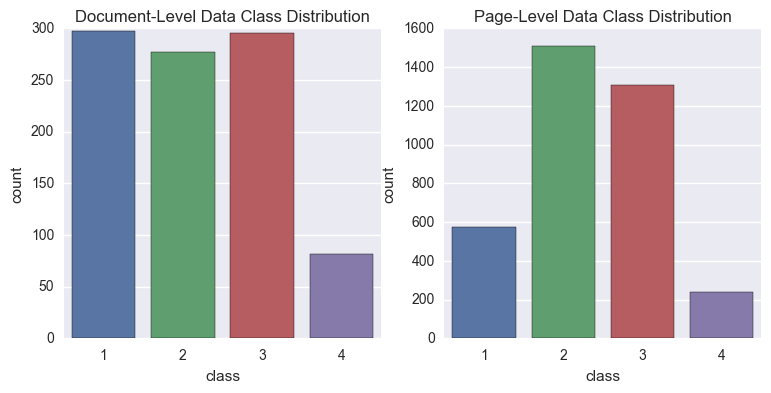

In [215]:
#plot class distributions
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(9,4))
i=0
for d in [data_doc,data_page]:
    plot=sns.countplot(x="class", data=d, order=['1','2','3','4'],ax=ax[i])
    if d.shape[1]==8:
        plot.set_title('Document-Level Data Class Distribution')
        i=i+1
    else:
        plot.set_title('Page-Level Data Class Distribution')
        i=i+1

In [216]:
# define X and y for each dataframe
Xd = data_doc.text
yd = data_doc['class']
Xp = data_page.text
yp = data_page['class']

## Tokenization

In [217]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

vect = CountVectorizer(stop_words='english')
Xd_dtm=vect.fit_transform(Xd)
Xp_dtm=vect.fit_transform(Xp)
print Xd_dtm.shape
print Xp_dtm.shape

(951, 41354)
(3630, 40483)


In [218]:
#check for strange words
print vect.get_feature_names()[5900:12000]

[u'___ulcers', u'___unfulfilled', u'___unusual', u'___vaginal', u'___varicose', u'___vasectomy', u'___vegan', u'___vegetarian', u'___vision', u'___visual', u'___vivid', u'___vomiting', u'___wake', u'___waking', u'___walking', u'___washing', u'___water', u'___weak', u'___weakness', u'___weight', u'___wheezing', u'___women', u'___worrying', u'___x', u'___yeast', u'___yes', u'__abortions', u'__alcoholism', u'__allergies', u'__animals', u'__anxiety', u'__appendicitis', u'__arteriosclerosis', u'__arthritis', u'__artificial', u'__asthma', u'__bedwetting', u'__birth', u'__bleeding', u'__blood', u'__broken', u'__cancer', u'__chest', u'__chicken', u'__coffee', u'__constipation', u'__coordination', u'__date______________________', u'__decreased', u'__depression', u'__diabetes', u'__difficulty', u'__dizziness', u'__ear', u'__easily', u'__eating', u'__edema', u'__email', u'__emotional', u'__emphysema', u'__epilepsy', u'__eye', u'__fainting', u'__first_______________________last________________\u4e

In [219]:
#need to replace ____ with whitespace
data_doc['text']=data_doc['text'].apply(lambda x: x.replace("_"," "))
data_page['text']=data_page['text'].apply(lambda x: x.replace("_"," "))
Xd=Xd.apply(lambda x: x.replace("_"," "))
Xp=Xp.apply(lambda x: x.replace("_"," "))

In [220]:
#run CountVectorizer again
Xd_dtm=vect.fit_transform(Xd)
Xp_dtm=vect.fit_transform(Xp)
print Xd_dtm.shape
print Xp_dtm.shape
print vect.get_feature_names()[5900:12000]

(951, 38213)
(3630, 37414)
[u'announcements', u'announces', u'annoy', u'annoyed', u'annoying', u'annoys', u'annu', u'annual', u'annually', u'annualstatutes', u'ano', u'anomalies', u'anomaly', u'anon', u'anonymity', u'anonymization', u'anonymous', u'anonymously', u'anopportunitytoaskanyquestions', u'anorectices', u'anorexia', u'anoscopy', u'anot', u'anote', u'anotherstudy', u'anp', u'anprovide', u'anpualrrquorssuch', u'anr', u'anreosbtsiaem', u'ans', u'ansara', u'anselmo', u'ansometimes', u'answ', u'answe', u'answer', u'answercompletedby', u'answered', u'answeredwithina', u'answerfield', u'answergiventorequestorby', u'answerinatertiary', u'answering', u'answerisneededhelpsprioritizerequestsand', u'answerneededfield', u'answers', u'answersandmtmlt', u'answerthequestioninthefirstsentenceofthe', u'answerto', u'ansxiety', u'ant', u'antabuse', u'antacid', u'antacids', u'antdhis', u'ante', u'antecedentes', u'antenatal', u'antepartum', u'anterior', u'anteriormente', u'antes', u'anthony', u'ant

In [221]:
#stemming
stemmer = SnowballStemmer('english')
def stem_function(x):
    words = TextBlob(x).words
    list_of_stems = [stemmer.stem(i) for i in words]
    return (" ").join(list_of_stems)

data_doc['stems'] = data_doc.text.apply(stem_function)
data_page['stems'] = data_page.text.apply(stem_function)

print 'done'

done


In [222]:
#implement CountVectorizer on stems
vect = CountVectorizer(stop_words='english')
Xd_dtm2=vect.fit_transform(data_doc['stems'])
Xp_dtm2=vect.fit_transform(data_page['stems'])
print Xd_dtm2.shape
print Xp_dtm2.shape

(951, 32220)
(3630, 31413)


In [223]:
#ngrams
vect = CountVectorizer(stop_words='english',ngram_range=(1, 2))
Xd_dtm3=vect.fit_transform(Xd)
Xp_dtm3=vect.fit_transform(Xp)
print Xd_dtm3.shape
print Xp_dtm3.shape
#only include terms that occur 3+ times
vect = CountVectorizer(stop_words='english',ngram_range=(1, 2),min_df=3)
Xd_dtm4=vect.fit_transform(Xd)
Xp_dtm4=vect.fit_transform(Xp)
print Xd_dtm4.shape
print Xp_dtm4.shape

(951, 375520)
(3630, 372306)
(951, 33220)
(3630, 42745)


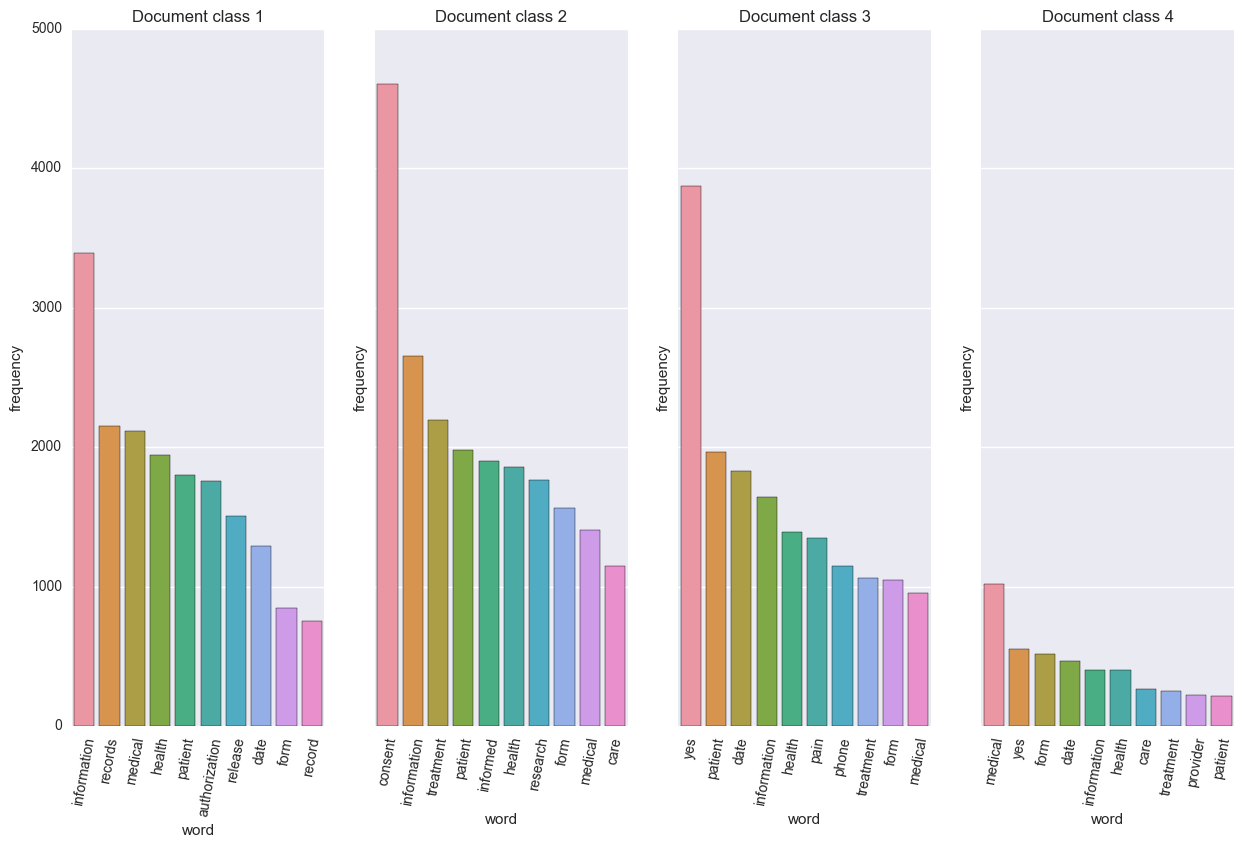

In [224]:
#histogram of 10 most common words in each class
vect = CountVectorizer(stop_words='english', max_features=1000)

def create_freq_vector(data,col,classval):
    data=data[data[col]==classval]
    dtm = vect.fit_transform(data['text'])
    freqs = [(word, dtm.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
    #sort from largest to smallest
    freq_vector=pd.DataFrame(sorted(freqs, key = lambda x: -x[1]))
    freq_vector.columns=['word', 'frequency']
    freq_vector[col]=classval
    return freq_vector[0:10]

#document data plot
fig, ax = plt.subplots(1,4, sharey=True,figsize=(15,9))
i=0
for classval in ['1','2','3','4']:
    v=create_freq_vector(data_doc,'class',classval)
    b=sns.barplot('word', 'frequency', data=v, ax=ax[i]) 
    b.set_xticklabels(v['word'], rotation=80);
    b.set_ylabel('frequency')
    b.set_title('Document class '+classval)
    i=i+1



In [225]:
#correlations between 22 most common words
vect = CountVectorizer(stop_words='english', max_features=22)
dd=pd.DataFrame(vect.fit_transform(Xd).toarray(), columns=vect.get_feature_names())
dp=pd.DataFrame(vect.fit_transform(Xp).toarray(), columns=vect.get_feature_names())
dd.head()

,address,authorization,care,consent,date,form,health,information,informed,medical,...,phone,records,release,research,signature,time,treatment,understand,use,yes
0,0,0,0,0,0,0,0,2,3,3,...,0,0,0,0,2,0,0,0,0,0
1,0,0,1,2,0,1,1,0,0,1,...,0,0,0,0,0,0,2,2,0,0
2,2,0,3,0,5,7,9,3,0,7,...,3,2,0,0,5,2,2,2,1,0
3,0,0,1,9,3,2,0,2,3,5,...,0,1,0,0,2,1,0,1,0,0
4,17,0,0,31,0,12,0,1,1,4,...,0,0,0,3,26,3,9,26,5,0


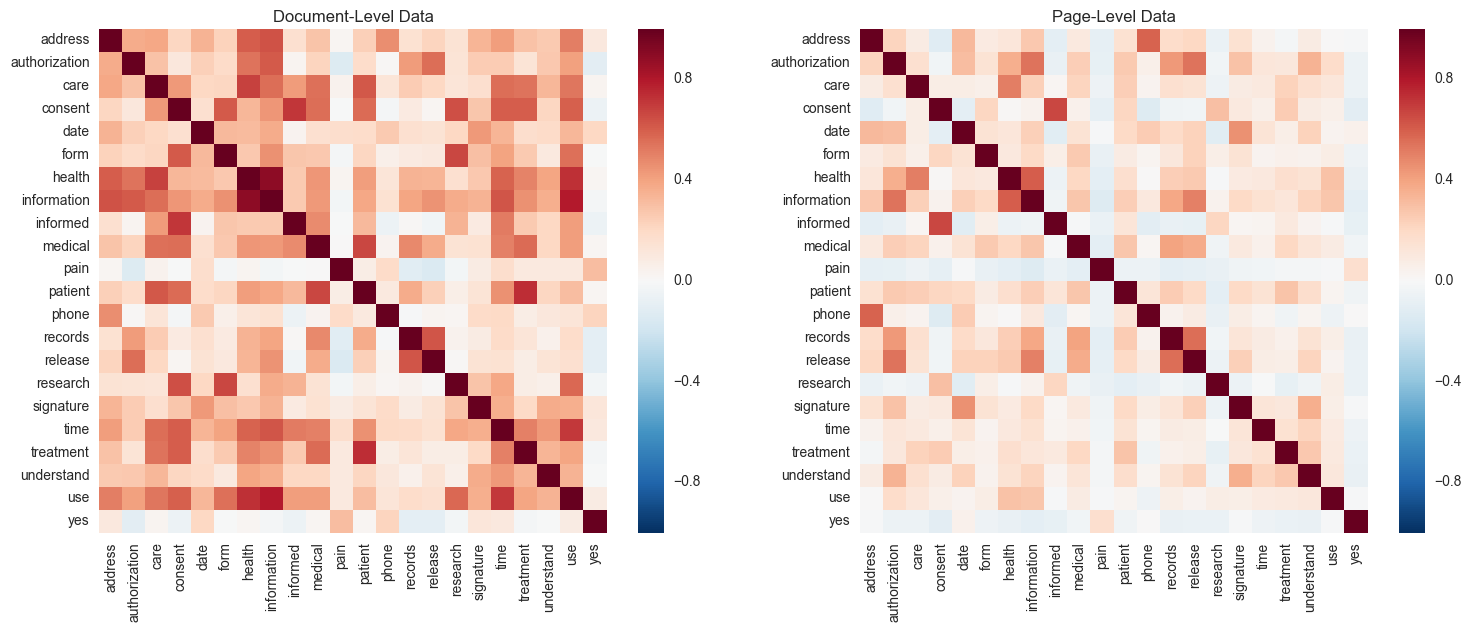

In [226]:
def corrplots(data):
    fig, ax = plt.subplots(1,2, figsize=(18,6.5))
    i=0
    for d in data:
        plot=sns.heatmap(d.corr(),ax=ax[i])
        if i==0:
            plot.set_title('Document-Level Data')
            i=i+1
        else:
            plot.set_title('Page-Level Data')
            i=i+1
corrplots([dd,dp])
#Interesting - not as many high correlations with page-level data


In [227]:
#TF-IDF - correlations between 22 most common words
vect = TfidfVectorizer(stop_words='english', max_features=22)
dd_2=pd.DataFrame(vect.fit_transform(Xd).toarray(), columns=vect.get_feature_names())
dp_2=pd.DataFrame(vect.fit_transform(Xp).toarray(), columns=vect.get_feature_names())
dd_2.head()

,address,authorization,care,consent,date,form,health,information,informed,medical,...,phone,records,release,research,signature,time,treatment,understand,use,yes
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.293362,0.787561,0.444786,...,0.000000,0.000000,0.0,0.000000,0.309601,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.207648,0.480528,0.000000,0.170363,0.197369,0.000000,0.000000,0.173494,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.400976,0.420557,0.000000,0.0
2,0.130907,0.0,0.201777,0.000000,0.248155,0.386275,0.575367,0.166791,0.000000,0.393374,...,0.216844,0.163296,0.0,0.000000,0.293374,0.134826,0.129880,0.136222,0.066272,0.0
3,0.000000,0.0,0.048031,0.500173,0.106326,0.078812,0.000000,0.079405,0.213171,0.200652,...,0.000000,0.058306,0.0,0.000000,0.083801,0.048140,0.000000,0.048639,0.000000,0.0
4,0.300755,0.0,0.000000,0.652085,0.000000,0.178983,0.000000,0.015027,0.026895,0.060757,...,0.000000,0.000000,0.0,0.112056,0.412340,0.054663,0.157974,0.478654,0.089564,0.0


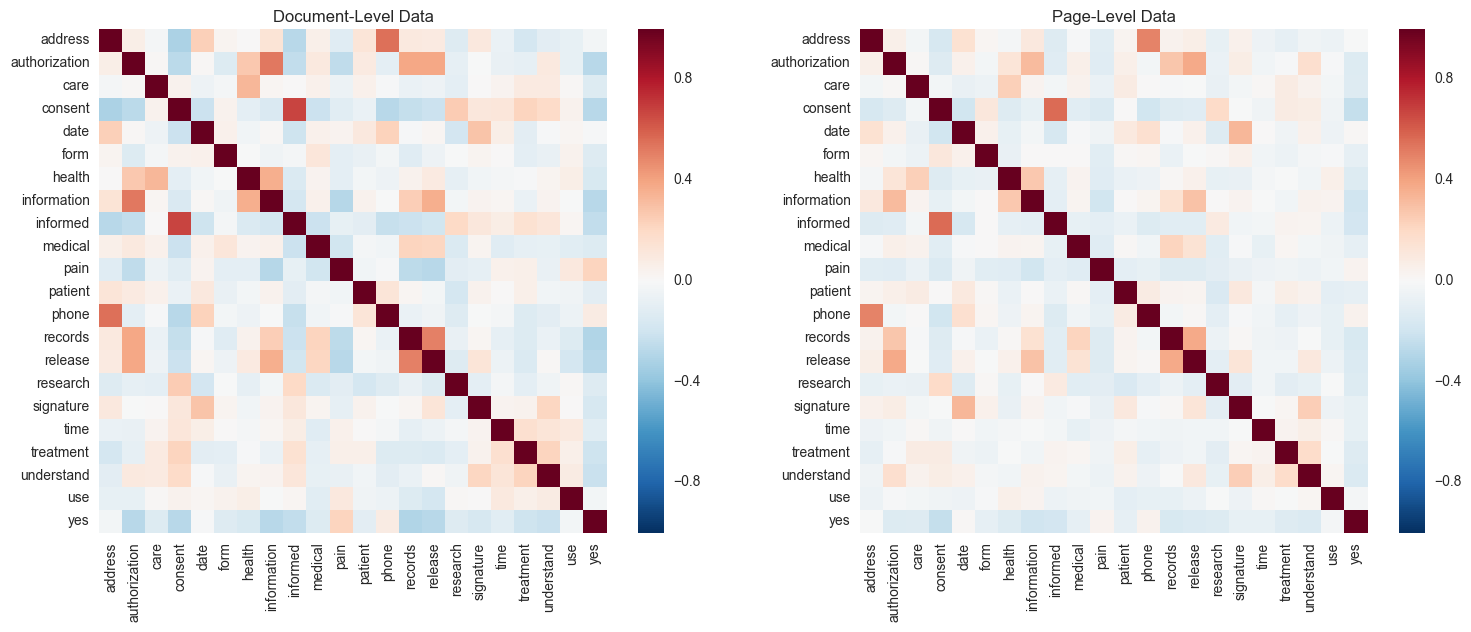

In [228]:
corrplots([dd_2,dp_2])
#page-level data looks more similar to document-level data


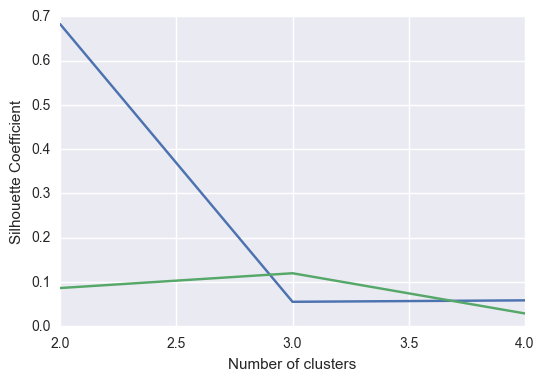

In [229]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler(with_mean=False)
vect = TfidfVectorizer(stop_words='english',max_features=10000)

#Cluster to see if there is inherent structure in the document-level data - try for 2, 3, 4 clusters. See is the clusters are similar to the classes
def fit_plot_clusters(k_range,data):
    def fitcluster(k,data):
        TfIdfm=vect.fit_transform(data)
        X=scaler.fit_transform(TfIdfm)  
        km = KMeans(n_clusters=k, random_state=1)
        kfit=km.fit(X)
        #Silhouette Coefficient for each k
        score=metrics.silhouette_score(X, km.labels_)
        return kfit, score

    kfits=[]
    scores = []

    for k in k_range:
        kfit,score=fitcluster(k,data)
        kfits.append(kfit)
        scores.append(score)

    plt.plot(k_range, scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)

#not good and gets worse as k increases
fit_plot_clusters([2,3,4],data_doc['text'])
#try with 3 classes
fit_plot_clusters([2,3,4],data_doc['text'][data_doc['class'] !='4'])

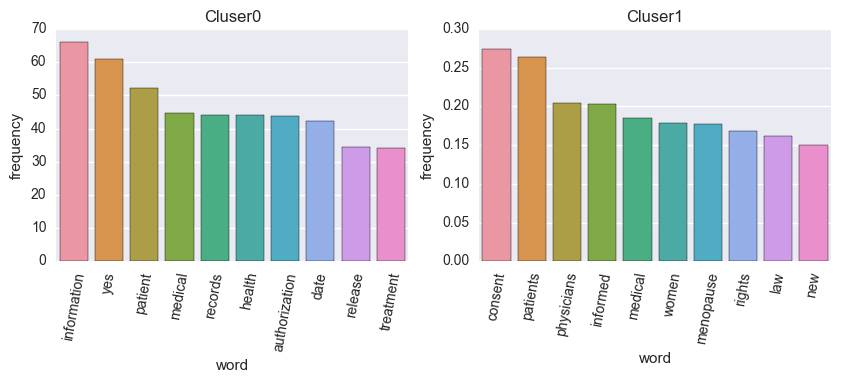

In [235]:
#most common words in each cluster (just showing for 2 clusters)
kfits=[]
scores = []
for k in [2,3,4]:
    kfit,score=fitcluster(k,data_doc['text'])
    kfits.append(kfit)
    scores.append(score)
    col=str(k)+'_cluster'
    data_doc[col]=kfit.labels_

fig, ax = plt.subplots(1,2, figsize=(10,3))
i=0
for k in [0,1]:
    v=create_freq_vector(data_doc,'2_cluster',k)
    b=sns.barplot('word', 'frequency', data=v, ax=ax[i]) 
    b.set_xticklabels(v['word'], rotation=80);
    b.set_ylabel('frequency')
    b.set_title('Cluser' +str(k))
    i=i+1

In [237]:
#class distribution by cluster - algotithm strongly prefers 1 (or 2) clusters, and doesn't seem to systematically detect the class except for perhaps 3 (intake forms)
for k in [2,3,4]:
    col=str(k)+'_cluster'
    print data_doc.groupby([col,'class']).size()


2_cluster  class
0          1        297
           2        276
           3        295
           4         82
1          2          1
dtype: int64
3_cluster  class
0          1        297
           2        276
           3        293
           4         82
1          2          1
2          3          2
dtype: int64
4_cluster  class
0          3         85
           4          1
1          1          1
2          2          1
3          1        296
           2        276
           3        210
           4         81
dtype: int64


In [246]:
#Look at document correlations using tf-idf matrix - see which classes of documents are correlated, and if the same classes are the most correlated
vect = TfidfVectorizer(stop_words='english',max_features=1000)
d_tfidf_matrix=pd.DataFrame(vect.fit_transform(Xd).toarray(), columns=vect.get_feature_names())
print d_tfidf_matrix.shape
d_corr_matrix=d_tfidf_matrix.dot(d_tfidf_matrix.transpose())
print d_corr_matrix.shape
d_corr_matrix.head()

(951, 1000)
(951, 951)


,0,1,2,3,4,5,6,7,8,9,...,941,942,943,944,945,946,947,948,949,950
0,1.000000,0.076514,0.464677,0.107760,0.092770,0.004864,0.097670,0.108693,0.059358,0.154430,...,0.071342,0.062474,0.079132,0.092217,0.130545,0.082755,0.151273,0.154176,0.124071,0.070067
1,0.076514,1.000000,0.099775,0.182770,0.274514,0.016426,0.124547,0.158114,0.140223,0.059748,...,0.052576,0.021304,0.038097,0.094956,0.104584,0.110694,0.091039,0.085043,0.077886,0.103605
2,0.464677,0.099775,1.000000,0.074321,0.080744,0.017819,0.124916,0.188263,0.122336,0.200617,...,0.092995,0.119345,0.165431,0.109981,0.121426,0.112402,0.166786,0.195798,0.123153,0.094809
3,0.107760,0.182770,0.074321,1.000000,0.172385,0.012241,0.198697,0.223757,0.160488,0.120790,...,0.075817,0.043387,0.044593,0.115006,0.106632,0.092739,0.143081,0.094351,0.203654,0.148253
4,0.092770,0.274514,0.080744,0.172385,1.000000,0.014397,0.124812,0.146589,0.141057,0.083331,...,0.063683,0.077150,0.036296,0.101110,0.049240,0.081376,0.116257,0.127691,0.125156,0.115100


In [249]:
#To get pairs with highest absolute correlation - adapted from stackoverflow:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(d_corr_matrix, 10))


Top Absolute Correlations
144  268    0.996550
489  768    0.995632
303  853    0.994865
627  916    0.989854
758  870    0.986869
457  714    0.983726
61   176    0.973503
148  322    0.967073
188  589    0.966668
522  730    0.957029
dtype: float64
(300, 1)


In [261]:
corr_pairs=pd.DataFrame(get_top_abs_correlations(d_corr_matrix, 500))
corr_pairs.reset_index(level=[0, 1],inplace=True)
#get the classes
corr_pairs.columns=['id1','id2','corr']
corr_pairs=pd.merge(left=corr_pairs,right=data_doc[['id','class']], left_on='id1', right_on='id')
corr_pairs=pd.merge(left=corr_pairs,right=data_doc[['id','class']], left_on='id2', right_on='id')
corr_pairs.head()
#All document classes correlate with class 1 (release form) the majority of the time, followed by class 3 (intake form)
corr_pairs.groupby(['class_x','class_y']).size()

class_x  class_y
1        1          67
         2          39
         3          71
         4           5
2        1          58
         2          34
         3          48
         4           5
3        1          55
         2          40
         3          45
         4           7
4        1           9
         2           7
         3           8
         4           2
dtype: int64

In [238]:
#try a basic model
from sklearn.naive_bayes import MultinomialNB
vect = TfidfVectorizer(stop_words='english',max_features=10000)
Xd_dtm = vect.fit_transform(data_doc['stems'])
Xp_dtm = vect.fit_transform(data_page['stems'])
nb = MultinomialNB()
fitd=nb.fit(Xd_dtm, yd)
fitp=nb.fit(Xp_dtm, yp)
print 'Document level data accuracy: '
print fitd.score(Xd_dtm, yd)
print 'Page level data accuracy: ' 
print fitp.score(Xp_dtm, yp)

Document level data accuracy: 
0.525762355415
Page level data accuracy: 
0.846556473829


In [239]:
#They don't do well with the 4th class there, seems like it's too similar to the other 3. Will try taking it out, or experimenting with other methods of classifying the 4th class
from sklearn.metrics import confusion_matrix
print confusion_matrix(yd,fitd.predict(Xd_dtm))
print confusion_matrix(yp,fitp.predict(Xp_dtm))

[[179  69  32  17]
 [ 30 118  36  93]
 [ 20  10 168  97]
 [  8  21  18  35]]
[[ 475   87   15    0]
 [   4 1450   57    0]
 [  10  149 1146    0]
 [   7  104  124    2]]
